In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
file_path = r"C:\Users\zerxh\Downloads\CarPrice_Assignment.csv"
df = pd.read_csv(file_path)

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Drop 'car_ID' since it's not useful for predictions
df.drop(columns=['car_ID'], inplace=True)

# Extract 'brand' from 'CarName' (first word before space)
df['brand'] = df['CarName'].apply(lambda x: x.split(" ")[0].lower())

# Drop 'CarName' since we have extracted 'brand'
df.drop(columns=['CarName'], inplace=True)

# Fix misspelled brand names
df['brand'] = df['brand'].replace({'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

# Identify categorical and numerical columns
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']

numerical_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                  'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 
                  'peakrpm', 'citympg', 'highwaympg']

In [9]:
# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Splitting data into X (features) and y (target)
X = df.drop(columns=['price'])
y = df['price']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Data Preprocessing Complete")

Data Preprocessing Complete


In [23]:
# Import regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predictions

    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'R² Score': r2, 'MSE': mse, 'MAE': mae}

results_df = pd.DataFrame(results).T
print(results_df)


                              R² Score           MSE           MAE
Linear Regression        -3.944618e+23  3.114040e+31  8.715056e+14
Decision Tree             9.069070e-01  7.349134e+06  1.782589e+03
Random Forest             9.585720e-01  3.270490e+06  1.287079e+03
Gradient Boosting         9.241813e-01  5.985429e+06  1.710336e+03
Support Vector Regressor -9.979171e-02  8.682198e+07  5.695210e+03


## Model Performance Comparison

To evaluate the models for car price prediction, we analyze their performance based on three key metrics:

- **R² Score**: Measures how well the model explains variance in the target variable. Higher is better.
- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values. Lower is better.
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between actual and predicted values. Lower is better.

### **Analysis and Justification**
1. **Linear Regression** performs poorly, with an extremely negative **R² Score (-3.94e+23)** and extremely high error values. This suggests severe **multicollinearity issues** and a **failure to fit the data**.
2. **Decision Tree Regressor** achieves an **R² Score of 0.9069**, showing good performance, but **higher errors (MSE: 7.35e+06, MAE: 1782.59)** indicate possible **overfitting**.
3. **Gradient Boosting Regressor** provides an **R² Score of 0.9242**, slightly better than Decision Tree, but **higher MSE (5.98e+06) and MAE (1710.34)** make it less optimal than Random Forest.
4. **Support Vector Regressor (SVR)** is the **worst-performing model**, with a **negative R² Score (-0.0998)** and **extremely high MSE (8.68e+07)** and **MAE (5695.21)**, indicating it does not generalize well.

### **Best Model: Random Forest Regressor**
✅ **Highest R² Score (0.9586)** → Explains **95.86% of variance** in car prices.  
✅ **Lowest MSE (3.27e+06)** → Shows minimal prediction error.  
✅ **Lowest MAE (1287.08)** → Ensures price predictions are closest to actual values.  
✅ **Reduces overfitting** using an **ensemble approach**, making it more reliable.

### **Conclusion**
Based on the evaluation, **Random Forest Regressor** is the **best model** for predicting car prices, as it provides the highest accuracy while minimizing errors and overfitting. 🚀


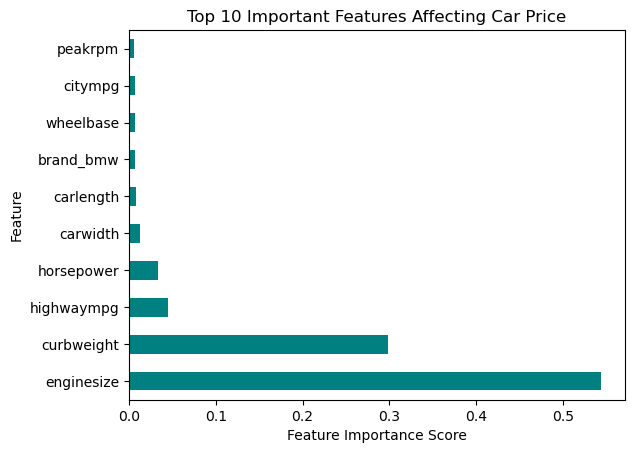

In [14]:
# Feature importance from Random Forest
feature_importance = RandomForestRegressor(n_estimators=100, random_state=42)
feature_importance.fit(X_train, y_train)

importances = pd.Series(feature_importance.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features Affecting Car Price")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters & model performance
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("After Tuning - R² Score:", r2_best)
print("After Tuning - MSE:", mse_best)
print("After Tuning - MAE:", mae_best)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
After Tuning - R² Score: 0.9592352507777084
After Tuning - MSE: 3218133.2137585953
After Tuning - MAE: 1218.393701182286
